# Quickstart: Explaining the Titanic Dataset

In this tutorial, we will walk through the basic process of using and understand an ML model using Pyreal to understand the Titanic dataset. We will use an ML model to understand what factors correlated with passengers surviving the sinking of the Titanic.

### In this tutorial, you will learn...
1. How to use basic Pyreal transformers required to get data model-ready
2. How to use three basic types of Pyreal Explainers
3. How to use the `visualize` module to get simple visualizations of explanations

Data source:
Kaggle. (2012). Titanic: Machine Learning from Disaster. Retrieved from https://www.kaggle.com/c/titanic/data.


# Introduction to RealApp objects

The highest-level objects in Pyreal are RealApps. These objects hold all components of the ML workflow, allowing you to make and understand model predictions with single lines of code.

To see the basic RealApp functionality, we will load in a pre-made RealApp and inspect our input data.

In [12]:
from pyreal.sample_applications import titanic

realapp = titanic.load_app()
X = titanic.load_data(n_rows=300)

X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can now make ML model predictions using the `.predict()` function.

In [13]:
predictions = realapp.predict(X)

passenger_id = 1
print(f"Passenger {passenger_id} is predicted to have {predictions[passenger_id]}")

Passenger 1 is predicted to have Survived


We can generate explanations of model predictions using the `.produce_[EXPLANATION_TYPE]` functions.  Let's generate a local feature contribution object, which explains a model prediction for a passenger by explaining how much each feature (input) value contributed to the final prediction.

We can visualize the resulting explanation using the `visualize` module.

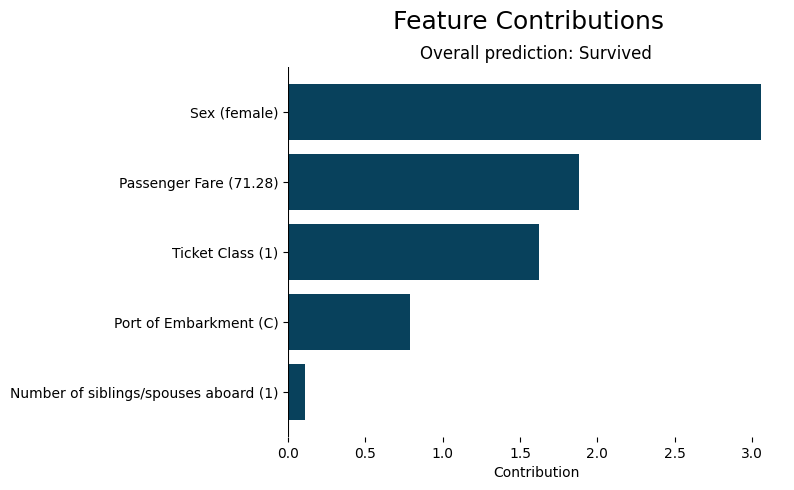

In [14]:
from pyreal.visualize import feature_bar_plot

contributions = realapp.produce_feature_contributions(X)
feature_bar_plot(contributions[passenger_id], 
                 prediction=predictions[passenger_id])

# Creating RealApps

To make a new RealApp for an application, you will need:
1. The training data and target values (or ground-truth values for the quantity your ML model predicts). We refer to input data as x and target values as y.
2. Any data transformers that prepare the data for predictions, and possibly additional transformers that make the data easier to understand. The Data Preparation and Modeling guides give more details on selecting these transformers.
3. A trained model. This can be any object with a .predict() function that takes an input and outputs a prediction, such as an sklearn estimator or a pytorch neural network.
4. Optionally, a dictionary of default feature names to more descriptive feature strings
5. Optionally, a function that formats model predictions into a readable format.

In the cell below we load in or create these five components for our sample Titanic application. See the *User Guide* tutorial for instructions on how to prepare these yourself.


In [15]:
# 1. Load in data
x, y = titanic.load_data(n_rows=300, include_targets=True)

# 2. Load in Transformers
transformers = titanic.load_transformers()

# 3. Load in trained ML model
model = titanic.load_model()

# 4. Create readable feature descriptions
feature_descriptions = {
    "PassengerId": "Passenger ID",
    "Pclass": "Ticket Class",
    "SibSp": "Number of siblings/spouses aboard",
    "Parch": "Number of parents/children aboard",
    "Ticket": "Ticket Number",
    "Fare": "Passenger Fare",
    "Cabin": "Cabin Number",
    "Embarked": "Port of Embarkment",
}

# 5. Set up prediction format function (converts True/False predictions to "Survived/Died"
def boolean_to_description(prediction):
    return "Survived" if prediction else "Died"

You can now create your RealApp using these components, and use it to make and understand predictions as above.

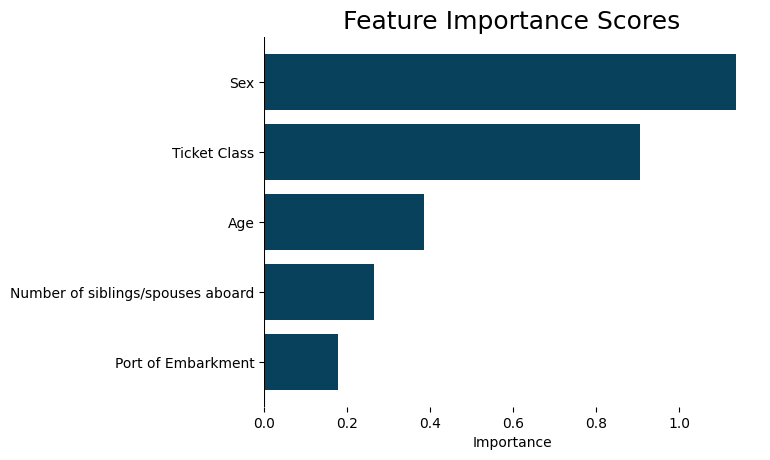

In [24]:
from pyreal import RealApp

realapp = RealApp(model, x, y, 
                  transformers=transformers,
                  feature_descriptions=feature_descriptions,
                  pred_format_func=boolean_to_description)

importance_scores = realapp.produce_feature_importance()
feature_bar_plot(importance_scores)